
# **Assignment 1**


## Task 1. Correlation
We will use the data example from the textbook "Statistical Analysis with The General Linear Model" by Miller and Haden (2013), Chapter 11.

As in Miller and Haden, we have five columns:

-Participant (Participant),

-Reading Ability (Abil),

-Intelligence (IQ),

-Number of minutes spent reading at home per week (Home),

-Number of minutes spent watching TV per week (TV).


For the task we will focus on the relationship between Reading Ability and IQ, but for further practice you can look at other relationships on your own.

**Question 1**:

a. Check whether the data is interval, ratio, or ordinal.

b. Check whether there is a data point for each participant on both variables.

c. Check whether the data is normally distributed in both variables.

d. Create a scatter plot with Reading Ability being the x-axis and IQ, being the y-axis.

e. Draw a correlation line on the scatter plot.


**Instructions:**

1. Load the necessary libraries and explain why you need them ("#used for ...").

2. Read the MillerHadenData.csv file into a DataFrame and name it "df_mh".

In [7]:
import pandas as pd # used for data wrangling
import seaborn as sns # used for visualization
import matplotlib  # used for visualization
from matplotlib import pyplot as plt # used for visualization
import pylab # used as part of matplot lib
import pingouin as pg # used for statistical test
import scipy.stats as stats #used for statistical tests

df_mh = pd.read_csv('data/MillerHadenData.csv')



In [3]:
# Q1a (code):
# Display first few rows of the dataframe
df_mh.head()

# Check data types and information
df_mh.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Participant  25 non-null     int64
 1   Abil         25 non-null     int64
 2   IQ           25 non-null     int64
 3   Home         25 non-null     int64
 4   TV           25 non-null     int64
dtypes: int64(5)
memory usage: 1.1 KB


In [5]:
# Q1b (code):
# Check for missing values
df_mh.isna().sum()

# Check whether there is a data point for each participant on both variables
df_mh.isnull()


,Participant,Abil,IQ,Home,TV
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


#### First, let's check if the Ability variable is normally distributed, using a histogram and the Shapiro-Wilkes test. 

Shapiro-Wilkes's test is not significant - normally distributed


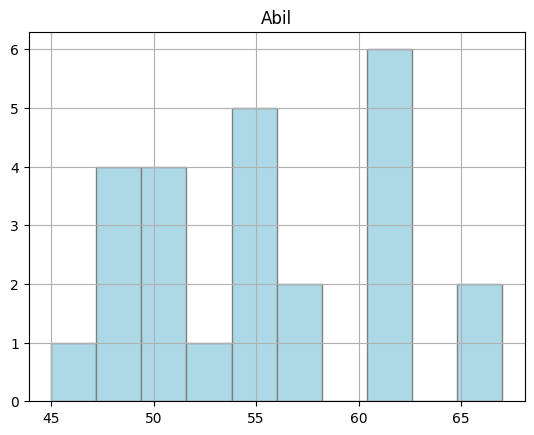

In [8]:
# Q1c (code):
# Check data distribution
df_mh.hist('Abil', color = 'lightblue', ec = 'grey')

score_shapiro_abil, p_val_shapiro_abil = stats.shapiro(df_mh['Abil'])

if p_val_shapiro_abil < 0.05:
    print("Shapiro-Wilkes's test is significant- not normal distribution")
else:
    print("Shapiro-Wilkes's test is not significant - normally distributed")


Based on the results, we can conclude that the Ability variable is normally distributed. 

#### Now, let's check the IQ variable. 

Shapiro-Wilkes's test is not significant - normally distributed


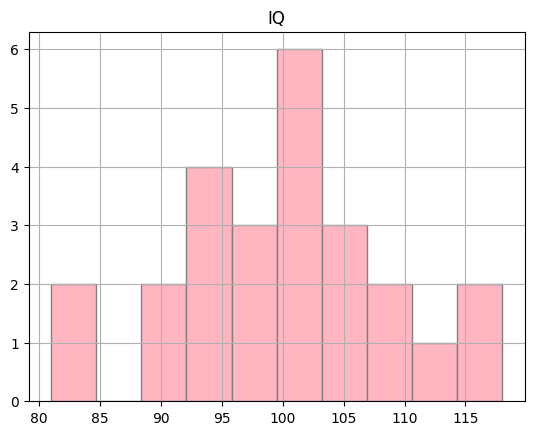

In [9]:
# checking the distribution of the variable 'IQ' visually through a histogram 
df_mh.hist('IQ', color = 'lightpink', ec = 'grey')

score_shapiro_iq, p_val_shapiro_iq = stats.shapiro(df_mh['IQ'])

if p_val_shapiro_iq < 0.05:
    print("Shapiro-Wilkes's test is significant- not normal distribution")
else:
    print("Shapiro-Wilkes's test is not significant - normally distributed")

Because both of the variables are normally distributed (with the p-values of the Shapiro-Wilkes normality tests above 0.5), we can continue with the analysis. 

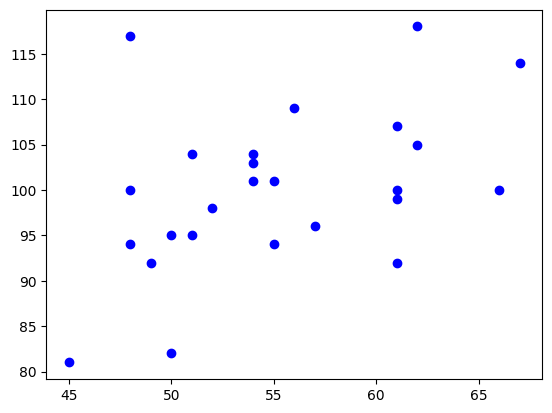

In [10]:
# Q1d (code):
# Scatter plot
#Create a scatter plot with Reading Ability being the x-axis and IQ, being the y-axis.

x = df_mh['Abil']
y = df_mh['IQ']

plt.scatter(x, y, color = 'blue')
plt.show()



<Axes: xlabel='Abil', ylabel='IQ'>

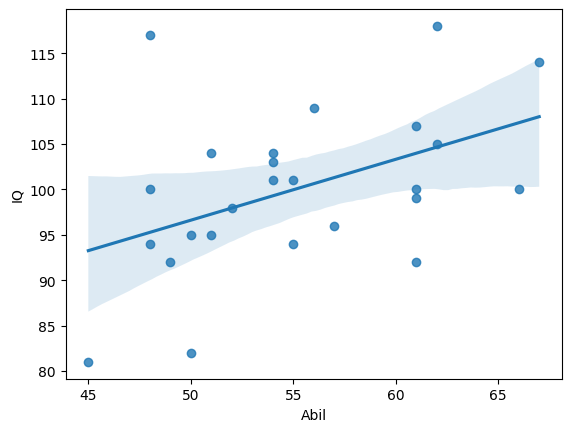

In [11]:
# Q1e (code):
# Correlation line
sns.regplot(data=df_mh, x="Abil", y="IQ")

In this plot, we can see a positive correlation between Reading Ability and IQ; as the IQ values increase the Ability values increase as well. 

**Question 2**:

a. Which correlation coefficient test can we use, Pearson or Spearman? Briefly explian why based on the results of Question 1.

b. Conduct a correlation coefficient test.

c. Interpret the result (direction and strength of the association between the two varibles)

# Q2a (answer with words):
We should use the Pearson because the data is from an interval scale (IQ and Reading Ability) and not ordinal data, which is more appropriate for the Spearman. Additionally, there seems to be a linear relationship which also is best tested with the Pearson coefficient. 

Additionally, because both of the variables have normally distributed data, we can use the Pearson test. 

In [12]:
# Q2b (code):
iq_srs = df_mh['IQ'].squeeze()
ability_srs = df_mh['Abil'].squeeze()

corr = pg.corr(iq_srs, ability_srs)
print(corr)

          n        r         CI95%     p-val   BF10     power
pearson  25  0.45117  [0.07, 0.72]  0.023593  2.804  0.640299


# Q2c (answer with words):
The p-value from the Pearson test is 0.0235, which is less than 0.05, meaning there is strong significance in the test. 

The r value from our test is 0.45117, which means there is a low to moderate positive correlation between iq and reading ability. 

## Task 2. Chi-square Test
We will continue to use the data example from Task 1.

We want to explore whether there are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability). Therefore, we will divide the reading ability of all participants into two groups. The first group is those with low reading ability (Reading Ability at or below the rounded average), and the second group is those with high reading ability (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Abil".


Similarly, the reading time is divided into two different scenarios: the first scenario is infrequent reading (Home at or below the rounded average), and the other is frequent reading (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Home".


Then, construct a Contingency Matrix and perform a Chi-square test.

**Question 3**:

a. Please state the null hypothesis (H0) and alternative hypothesis (H1) for this Chi-square test.

b. Based on the task description, add new columns “Rank_Abil” and "Rank_Home" to the dataframe df_mh.

c. Construct a Contingency Matrix.

d. Perform a Chi-square test.

e. Interpret the results of the Chi-square test (answer in text).

# Q3a (answer in words):

H0: Reading ability and amount of time spent reading at home are independent (there is no association between the variables).

H1：Reading ability and amount of time spent reading at home are associated.

In [18]:
# Q3b (code):
# Import necessary libraries
import pandas as pd  ##used for dataframes
from scipy.stats import chi2_contingency ##used for statistical testing
import numpy as np

# Define the rounded average for Reading Ability and Home
rounded_average_Abil = round(df_mh['Abil'].mean())
rounded_average_Home = round(df_mh['Home'].mean())

print(f"Ability: {rounded_average_Abil}")
print(f"Home: {rounded_average_Home}")

Ability: 55
Home: 124


In [21]:
# Create the Rank_Abil column
abil_mean = df_mh["Abil"].mean()
df_mh['Rank_Abil'] = ['high' if x > abil_mean else 'low' for x in df_mh['Abil']]


# Create the Rank_Home column
home_mean = df_mh["Home"].mean()
df_mh['Rank_Home'] = ['frequent' if x > home_mean else 'infrequent' for x in df_mh['Home']]
df_mh.head()

,Participant,Abil,IQ,Home,TV,Rank_Abil,Rank_Home
0,1,61,107,144,487,high,frequent
1,2,56,109,123,608,high,infrequent
2,3,45,81,108,640,low,infrequent
3,4,66,100,155,493,high,frequent
4,5,49,92,103,636,low,infrequent


In [22]:
# Q3c (code):
# Construct Contingency Matrix
contingency_matrix = pd.crosstab(df_mh['Rank_Abil'], df_mh['Rank_Home'])

# Display the contingency matrix
contingency_matrix


Rank_Home,frequent,infrequent
Rank_Abil,,
high,8,2
low,3,12


In [23]:
# Q3d (code):
# Perform the Chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_matrix)

# Display the results
print("Chi-square Statistic:", chi2_stat)
print("p-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)

Chi-square Statistic: 6.500270562770561
p-value: 0.010785807794066234
Degrees of Freedom: 1
Expected Frequencies:
[[4.4 5.6]
 [6.6 8.4]]


# Q3e (answer in words):
Because the p-value is 0.01079, which is less than 0.05, the result of the test is statistically significant. Therefore, we can reject the null hypothesis that there will be no difference between reading ability and frequency of reading at home. There seems to be a difference between those with higher reading abilities and frequency of reading at home, and based on this it seems that those who spend more time reading at home will also likely have a higher reading ability. 

Based on this test, people with different reading abilities also spend different amounts of time reading at home

## Task 3. Two-sample t-test
As we discussed on Week 3, Two-sample designs are very useful when we want to know whether there is a difference between groups on a particular variable.

In this assignment, you will be guided to replicate the Experiment 4 (p. 887-888) from the paper below, focusing on understanding the data through descriptive statistics, visualizing distributions, testing assumptions (normality and variance homogeneity), and finally performing the independent t-test.

Schroeder, J. and Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a job candidate's appeal. Psychological Science, 26, 277--891.


As we explained during Week 3 lecture, there are different types of two-sample designs depending on whether or not the two groups are independent (e.g., different participants in different conditions) or not (e.g., same participants in different conditions). In this course we focus on independent samples, which typically means that the observations in the two groups are unrelated - usually meaning different people. But in real practice you will need to go through similar procedures to determine which is the proper statistical test to use.




### Background of data: Speech as indicator of intellect
To recap on Experiment 4, 39 professional recruiters from Fortune 500 companies evaluated job pitches of M.B.A. candidates (Masters in Business Administration) from the University of Chicago Booth School of Business. The methods and results appear on pages 887--889 of the article if you want to look at them specifically for more details.

###Step 1: Analyze the demographics of evaluators from the provided dataset

**Instructions:**

1. Load the necessary libraries (pandas, scipy, numpy, matplotlib.pyplot, seaborn) and explain why you need them ("#used for ...").

2. Read the evaluators.csv file into a DataFrame.

3. Calculate the mean and standard deviation of the age of the evaluators, handling missing values appropriately.

4. Count how many male and female evaluators were in the study.

**Question 4:**

a. What was the mean age of the evaluators?
What was the standard deviation of the age of the evaluators?

b. How many participants were female and how many participants were male?


In [25]:

import pandas as pd # used for dataframes and working iwht the data
from scipy import stats #used for statsitcal testing
import numpy as np #used for statsitical testing and correlations
import matplotlib.pyplot as plt ## used for plotting and visualizations
import seaborn as sns #used for plotting and visualizations

# Load the data
df_evaluators = pd.read_csv('data/evaluators.csv')
df_evaluators.head()


,eval_id,condition,age,sex
0,1,listened,29.0,2.0
1,2,listened,27.0,2.0
2,3,listened,27.0,2.0
3,4,read,40.0,2.0
4,5,read,32.0,2.0


In [28]:
# Q4a (code):
# Calculate mean and standard deviation for age
age_mean = df_evaluators['age'].mean()
age_std = df_evaluators['age'].std()

# Display the results
print(f"Mean age: {age_mean}")
print(f"Standard deviation: {age_std}")

Mean age: 30.852941176470587
Standard deviation: 6.238358141327351


In [30]:
# Q4b (code)
# Count male and female evaluators
# In the 'sex' column: 1 represents males and 2 represents females
gender_count = df_evaluators['sex'].value_counts()

#Display results
print(f"Number of male evaluators: {gender_count[1]}")
print(f"Number of female evaluators: {gender_count[2]}")

Number of male evaluators: 4
Number of female evaluators: 30


###Step 2: Calculate overall intellect ratings from evaluators and prepare a combined dataset for analysis

We are now going to calculate an overall intellect rating given by each evaluator. To break that down a bit, we are going to calculate how intellectual the evaluators (the raters) thought candidates were overall, depending on whether the evaluators read or listened to the candidates' resume pitches. This is calculated by averaging the ratings of competent, thoughtful and intelligent for each evaluator held within ratings.csv.

Note: We are not looking at ratings to individual candidates; we are looking at overall ratings for each evaluator. This is a bit confusing but makes sense if you stop to think about it a little. You can think about it in terms of "do raters rate differently depending on whether they read or listen to a resume pitch".
We will then combine the overall intellect rating with the overall impression ratings and overall hire ratings for each evaluator, all ready found in ratings.csv. In the end we will have a new new dataframe named "ratings2" - which has the below structure:

**eval_id** shows the evaluator ID. Each evaluator has a different ID. So all the 1's are the same evaluator.

**Category** shows the scale that they were rating on - intellect, hire, impression

**Rating** shows the overall rating given by that evaluator on a given scale.

**condition** shows whether that evaluator listened to (e.g., evaluators 1, 2 and 3), or read (e.g., evaluator 4) the resume.


**Instructions:**

1. Load the ratings.csv file.

2. Filter and calculate the mean intellect rating for each evaluator.

3. Combine this with overall impression and hire ratings to create a new DataFrame named "rating2".

4. Merge this DataFrame with the evaluator demographics.

**Question 5**:

Print the head of "rating2".


In [32]:
# Load ratings data
df_ratings = pd.read_csv('data/ratings.csv')
df_ratings.head()


,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
3,1,impression,7.0
4,1,hire,6.0


In [34]:
# Q5 (code):
# Filter the ratings DataFrame to include only 'thoughtful', 'competent', and 'intelligent' categories
df_filtered = df_ratings[df_ratings['Category'].isin(['thoughtful', 'competent', 'intelligent'])]

# Calculate the mean intellect rating for each evaluator
# Group by 'eval_id' and calculate mean, then reset the index to convert groupby object back to DataFrame
intellect_mean = df_filtered.groupby('eval_id')['Rating'].mean().reset_index()


# Add a 'Category' column with the value 'intellect' for these rows
intellect_mean['Category'] = 'intellect'


# Create a DataFrame for 'impression' and 'hire' ratings
other_ratings = df_ratings[df_ratings['Category'].isin(['impression', 'hire'])]


# Combine the DataFrames to create 'ratings2'
# Concatenate the 'intellect_mean' DataFrame with the 'other_ratings' DataFrame
ratings2 = pd.concat([intellect_mean, other_ratings])


# Join 'ratings2' with the 'df_evaluators' DataFrame to add the 'condition' column
ratings2 = ratings2.merge(df_evaluators[['eval_id', 'condition']], on='eval_id', how='left')


# Select only the necessary columns as per the structure required
ratings2 = ratings2[['eval_id', 'Category', 'Rating', 'condition']]


# Arrange by 'eval_id' and 'Category'
ratings2 = ratings2.sort_values(by=['eval_id', 'Category'])


# Display the first few rows of the final 'ratings2' DataFrame to verify
ratings2.head()

,eval_id,Category,Rating,condition
40,1,hire,6.000000,listened
39,1,impression,7.000000,listened
0,1,intellect,6.000000,listened
42,2,hire,4.000000,listened
41,2,impression,4.666667,listened


###Step 3: Perform descriptive and inferential statistical analyses, including testing assumptions and conducting independent t-tests.

We are going to run the t-tests for Intellect, Hire and Impression; each time comparing evaluators overall ratings for the listened group versus overall ratings for the read group to see if there was a significant difference between the two conditions: i.e., did the evaluators who listened to pitches give a significant higher or lower rating than evaluators that read pitches?

**Question 6**:

a. In terms of hypotheses, how can we phrase the hypothesis?

b. Which t-test should we choose, one-tail or two-tail? And explian why.

c. What are the independent variable and the dependent variable here?



# Q6a (answer in words):
#### Null hypothesis:
There is no significant difference between overall ratings on the hire/impression/intellect scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H0:μ1=μ2).
#### Alternative hypothesis:
There will be a significant difference between overall ratings on the hire/impression/intellect scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H1:μ1≠μ2).


# Q6b (answer in words):
# Which t-test should we choose, one-tail or two-tail? Explian why.
We will do a two-tailed test because the test is undirectional-- so we are examing if it is a higher or a lower rating, not one or the other. 

The one-tailed test can miss potential differences in one direction or another, which can cause incorrectly rejecting a true H0 or failing to reject a false H0. 

# Q6c (answer in words):
# What are the independent variable and the dependent variable here?

The independent variable is the condition (read or listen) and the dependent variable is the rating. 


To clarify, we are going to run three between-subjects t-tests in total; one for intellect ratings; one for hire ratings; one for impression ratings.

**Instructions:**

1. Descriptive analysis of the ratings.

2. Test for normal distribution (Shapiro-Wilk test) and homogeneity of variances (Levene's test) for the intellect, impression, and hire ratings.

3. Conduct independent t-tests comparing intellect, impression, and hire ratings between conditions (listened vs. read).

Hints: three T-tests need to be performed.

**Question 7**:

a: Print the test results.

b: Interpret the results of the above descriptive statistics, Shapiro-Wilk test, Levene's test, and independent t-tests. Explian why we use these tests and how we made our decisions based on the test result.

In [36]:
##Q7a (code):
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu # used for statistical testing 


# Descriptive analysis of the ratings
desc_df = ratings2.groupby("Category")['Rating'].describe()
print(desc_df)


            count      mean       std       min       25%       50%  75%  \
Category                                                                   
hire         39.0  3.871795  2.330343  0.000000  2.000000  4.000000  5.0   
impression   39.0  5.094017  2.254234  0.333333  3.666667  5.333333  7.0   
intellect    39.0  4.717949  2.000787  0.666667  3.500000  5.000000  6.0   

                 max  
Category              
hire        8.000000  
impression  8.666667  
intellect   9.000000  


The average rating for the impression category is the highest out of the three, with a mean of 5.09. The hire category had the lowest average score with 3.87 as the mean and the intellect category mean was in the middle with a score of 4.72.  

In [37]:
# Test for normal distribution (Shapiro-Wilk test)
shapiro_results = {}

for category in ratings2['Category'].unique():
    category_ratings = ratings2[ratings2['Category'] == category]['Rating']
    score_shapiro, p_val_shapiro = shapiro(category_ratings)
    shapiro_results[category] = p_val_shapiro
print(shapiro_results)


{'hire': 0.04710446957162048, 'impression': 0.17238601967726547, 'intellect': 0.5182711227230219}


The results of the Shapiro Wilk test indicate that only the hire category is not normally distributed, as it has a p-value of just under 0.05. Because it is not normally distributed, a Mann-Whitney U test will have to be performed. 

However, the impression and the intellect category both are normally distributed according to this test. 

In [39]:

# Test for homogeneity of variances (Levene's test)
levene_results = {}
for category in ratings2['Category'].unique():
    listened_ratings = ratings2[(ratings2['Category'] == category) & (ratings2['condition'] == 'listened')]['Rating']
    read_ratings = ratings2[(ratings2['Category'] == category) & (ratings2['condition'] == 'read')]['Rating']
    score_levene, p_val_levene = levene(listened_ratings, read_ratings)
    levene_results[category] = p_val_levene
print(levene_results)



{'hire': 0.7458453933447955, 'impression': 0.5358960150374064, 'intellect': 0.34946205893248505}


Based on this test, we can say that the assumption of homogeneity of variances is met as the p-value for each category is above 0.05. 

In [40]:
# Independent t-tests
# Independent t-tests
from scipy.stats import mannwhitneyu # used for the Mann-Whitney U test

# Independent t-test for 'impression' category (with normality)
impression_listened = ratings2[(ratings2['Category'] == 'impression') & (ratings2['condition'] == 'listened')]['Rating']
impression_read = ratings2[(ratings2['Category'] == 'impression') & (ratings2['condition'] == 'read')]['Rating']
t_stat_impression, p_val_impression = ttest_ind(impression_listened, impression_read)

# Independent t-test for 'intellect' category (with normality)
intellect_listened = ratings2[(ratings2['Category'] == 'intellect') & (ratings2['condition'] == 'listened')]['Rating']
intellect_read = ratings2[(ratings2['Category'] == 'intellect') & (ratings2['condition'] == 'read')]['Rating']
t_stat_intellect, p_val_intellect = ttest_ind(intellect_listened, intellect_read)

# Mann-Whitney U test for 'hire' category (non-parametric test, not normal)
hire_listened = ratings2[(ratings2['Category'] == 'hire') & (ratings2['condition'] == 'listened')]['Rating']
hire_read = ratings2[(ratings2['Category'] == 'hire') & (ratings2['condition'] == 'read')]['Rating']
u_stat_hire, p_val_hire = mannwhitneyu(hire_listened, hire_read, alternative='two-sided')

# Print the results
print("Independent t-test for 'impression':")
print("t-statistic:", t_stat_impression)
print("p-value:", p_val_impression)

print("\nIndependent t-test for 'intellect':")
print("t-statistic:", t_stat_intellect)
print("p-value:", p_val_intellect)

print("\nMann-Whitney U test for 'hire':")
print("U statistic:", u_stat_hire)
print("p-value:", p_val_hire)

Independent t-test for 'impression':
t-statistic: 2.850766179025179
p-value: 0.007091060616710596

Independent t-test for 'intellect':
t-statistic: 3.5259329220482414
p-value: 0.0011444414996286821

Mann-Whitney U test for 'hire':
U statistic: 275.5
p-value: 0.014413410635040338


#### Q7b (answer in words):

Based on these two independent t-test and the Mann-Whitney U test, we can concluded that all of the categories are statistically siginificant with p-values below 0.05. 

For the Impression category, the positive t-test value indicates that the 'listened' condition is given a higher mean rating than the 'read' condition. Here, the p-value is 0.00709, which is less than the significance level of p < 0.05, meaning it is statistically significant. Therefore, we would reject the null hypothesis, and based on this test there is a difference in mean impression ratings between evaluators who listened versus read the pitches. 

For the Intellect category, there is another positive t-test value (3.5259), indicating again that the listened condition has higher mean rating than the read condition. The p-value of 0.0011 also indicates that this test is statistically significant, so we can reject the null hypothesis. Therefore, evaluators who listened to the pitches gave significanlty higher intellect ratings than those who read. 

For the Hire category, the U statistic cannot determine the direction of the difference, but the p-value of 0.0144 indicates that the test is significant and there is a difference in mean hire scores given by evaluators who listened and those who read the pitches. 

In conclusion, based on all of these significant test, we can conclude that there is a significant difference in mean scores in each category based on if the evaluator read or listened. 